(deriving-irk-methods-section)=
# Deriving implicit Runge-Kutta methods

There are several types of implicit Runge-Kutta methods which are derived using the [$B(k)$, $C(k)$ and $D(k)$ order conditions](Bk_Ck_Dk_order_conditions) along with the [row sum condition](row-sum-condition). 

(gauss-legendre-derivation)=
## Gauss-Legendre methods

Gauss-Legendre methods are a family of methods that are derived using [Gauss-Legendre quadrature](https://en.wikipedia.org/wiki/Gauss%E2%80%93Legendre_quadrature). An $s$-stage Gauss-Legendre method has order $k=2s$. They are derived using [Legendre polynomials](https://en.wikipedia.org/wiki/Legendre_polynomials) which are are a system of orthogonal polynomials.

````{admonition} Definition: Legendre polynomials
:class: note
:name: legendre-polynomials-definition

\begin{align}
   P_n (t)=\sum_{k=0}^n \binom{n}{k}\binom{n+k}{k}(t-1)^k,
\end{align}

where $\displaystyle\binom{n}{k}$ is the [binomial coefficient](https://en.wikipedia.org/wiki/Binomial_coefficient).
````

The values of the $c_i$ coefficients in a Gauss-Legendre method are the roots of $P_s(t)$, the values of the $b_i$ coefficients are chosen to satisfy the $B(k)$ condition and the $a_{ij}$ coefficients are chosen to satisfy the $C(\lfloor \frac{k}{2} \rfloor)$ condition.

`````{admonition} Example 3.2
:class: seealso
:name: fourth-order-Gauss-Legendre-method-example

Derive a fourth-order Gauss-Legendre method.

````{dropdown} Solution

A fourth-order Gauss-Legendre method will have $s = \frac{k}{2} = \frac{4}{2} = 2$ stages and the $c_i$ coefficients are chosen to satisfy $0=P_2(t)$

\begin{align*}
    0&=\binom{2}{0}\binom{2}{0}(t-1)^0 +\binom{2}{1}\binom{3}{1}(t-1)^1 +\binom{2}{2}\binom{4}{2}(t-1)^2 \\
    &=1 + 6t - 6 + 6t^2 - 12t + 6\\
    &=6t^2 - 6t+1,
\end{align*}

therefore

\begin{align*} 
    c_1 &= \frac{1}{2} - \frac{\sqrt{3}}{6}, \\
    c_2 &= \frac{1}{2} + \frac{\sqrt{3}}{6}.
\end{align*}

The $b_i$ and $a_{ij}$ coefficients are chosen to satisfy the $B(4)$ and $C(2)$ order conditions respectively

\begin{align*}
    b_1 + b_2 = & 1,\\
    b_1 c_1 + b_2 c_2 = & \frac{1}{2},\\
    a_{11} + a_{12} = & c_1 ,\\
    a_{21} + a_{22} = & c_2 ,\\
    a_{11} c_1 + a_{12} c_2 = & \frac{1}{2}c_1^2 ,\\
    a_{21} c_1 + a_{22} c_2 = & \frac{1}{2}c_2^2 .
\end{align*}

Using SymPy to solve the order conditions

```python
import sympy as sp
sp.init_printing()

# Define symbolic variables
t, a11, a12, a21, a22, b1, b2, c1, c2 = \
    sp.symbols("t, a11, a12, a21, a22, b1, b2, c1, c2")

# Calculate c values
P = 1 + sp.binomial(2,1) * sp.binomial(3,1) * (t - 1) \
    + sp.binomial(2,2) * sp.binomial(4,2) * (t - 1) ** 2
c1, c2 = sp.solve(P)
display(sp.solve(P))

# Define order conditions
eq1 = b1 + b2 - 1
eq2 = b1 * c1 + b2 * c2 - sp.Rational(1,2)
eq3 = a11 + a12 - c1
eq4 = a21 + a22 - c2
eq5 = a11 * c1 + a12 * c2 - sp.Rational(1,2) * c1 ** 2
eq6 = a21 * c1 + a22 * c2 - sp.Rational(1,2) * c2 ** 2

# Solve order conditions
sp.solve((eq1, eq2, eq3, eq4, eq5, eq6))
```

Gives the solution

\begin{align*}
    a_{11} &= \frac{1}{4}, &
    a_{12} &= \frac{1}{4} - \frac{\sqrt{3}}{6}, &
    a_{21} &= \frac{1}{4} + \frac{\sqrt{3}}{6}, \\
    a_{22} &= \frac{1}{4}, &
    b_1 &= \frac{1}{2}, &
    b_2 &= \frac{1}{2},
\end{align*}

so the fourth-order Gauss-Legendre method is 

\begin{align*}
    \begin{array}{c|cc}
        \frac{1}{2} - \frac{\sqrt{3}}{6} & \frac{1}{4} & \frac{1}{4} - \frac{\sqrt{3}}{6} \\
        \frac{1}{2} + \frac{\sqrt{3}}{6} & \frac{1}{4} + \frac{\sqrt{3}}{6} & \frac{1}{4} \\ \hline
        & \frac{1}{2} & \frac{1}{2}
    \end{array}
\end{align*}   
````
`````

In [1]:
import sympy as sp
sp.init_printing()

# Define symbolic variables
t, a11, a12, a21, a22, b1, b2, c1, c2 = \
    sp.symbols("t, a11, a12, a21, a22, b1, b2, c1, c2")

# Calculate c values
P = 1 + sp.binomial(2,1) * sp.binomial(3,1) * (t - 1) \
    + sp.binomial(2,2) * sp.binomial(4,2) * (t - 1) ** 2
c1, c2 = sp.solve(P)
display(sp.solve(P))

# Define order conditions
eq1 = b1 + b2 - 1
eq2 = b1 * c1 + b2 * c2 - sp.Rational(1,2)
eq3 = a11 + a12 - c1
eq4 = a21 + a22 - c2
eq5 = a11 * c1 + a12 * c2 - sp.Rational(1,2) * c1 ** 2
eq6 = a21 * c1 + a22 * c2 - sp.Rational(1,2) * c2 ** 2

# Solve order conditions
sp.solve((eq1, eq2, eq3, eq4, eq5, eq6))

KeyboardInterrupt: 

(radau-derivation)=
## Radau methods

Gauss-Legendre methods give us maximal order for the number of stages, however sometimes it is better the sacrifice order to gain better stability properties. An $s$-stage Radau method has order $k=2s-1$ and is A-stable (see [A-stability](a-stability-definition). There are two types of Radau methods: Radau IA and Radau IIA.

- For a **Radau IA** method the $c_i$ values are the roots of $0 = P_s(t) + P_{s-1}(t)$ and the values of $a_{ij}$ and $b_i$ satisfy the [$D(k)$ order condition](Bk_Ck_Dk_order_conditions).

- For a **Radau IIA** method the $c_i$ values are the roots of $0 = P_s(t) - P_{s-1}(t)$ and the values of $a_{ij}$ and $b_i$ satisfy the [$C(k)$ order condition](Bk_Ck_Dk_order_conditions).

````{admonition} Example 3.3
:class: seealso
:name: radau-derivation-example

Derive a third-order Radau IA method.

```{dropdown} Solution

An order $k=3$ Radau IA method will have $s=\frac{k + 1}{2} = \frac{3 + 1}{4} = 2$ stages. The values of $c_1$ and $c_2$ are the roots of $0=P_2(t)+P_1(t)$
   
\begin{align*}
    0 = (6t^2 -6t+1)+(2t-1) = 6t^2 -4t = 2t(3t - 2),
\end{align*}
   
so $c_1 = 0$ and $c_2 = \frac{2}{3}$. The values of $b_i$ and $a_{ij}$ need to satisfy the $B(4)$ and $D(2)$ order conditions respectively. Substituting the values of $c_1$ and $c_2$ give

\begin{align*}
    b_1 + b_2 &= 1, \\
    \tfrac{2}{3}b_2 &= \tfrac{1}{2}, \\
    b_1 a_{11} + b_2 a_{21} &= b_1 (1 - 0), \\
    b_1 a_{12} + b_2 a_{22} &= b_2 (1 - \tfrac{2}{3}), \\
    \tfrac{2}{3} b_2 a_{21} &= \tfrac{1}{2} b_1 (1 - 0^2), \\
    \tfrac{2}{3} b_2 a_{22} &= \tfrac{1}{2} b_2 (1 - (\tfrac{2}{3})^2).
\end{align*}

From the second equation we have $b_2 = \frac{3}{4}$ and from the first we have $b_1 = \frac{1}{4}$. The fifth equation is now $\frac{1}{2} a_{21} = \frac{1}{8}$ so $a_{21} = \frac{1}{4}$ and the sixth equation is $\frac{1}{2} a_{22} = \frac{5}{25}$ so $a_{22} = \frac{5}{12}$. The third equation is now $\frac{1}{4} a_{11} + \frac{3}{4} (\frac{1}{4}) = \frac{1}{4}$ so $a_{11} = \frac{1}{4}$ and the fourth equation is $\frac{1}{4} a_{12} + \frac{3}{4}(\frac{5}{12}) = \frac{3}{4} (\frac{1}{3}) = -\frac{1}{4}$.

So the third-order Radau IA method is

\begin{align*}
    \begin{array}{c|cc}
        0 & \tfrac{1}{4} & -\tfrac{1}{4} \\
        \tfrac{2}{3} & \tfrac{1}{4} & \frac{5}{12} \\ \hline
        & \tfrac{1}{4} & \tfrac{3}{4}
    \end{array}
\end{align*}
```
````

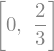

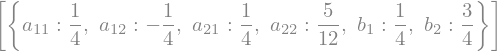

In [2]:
import sympy as sp
sp.init_printing()

# Define Legendre polynomial
def P(n):
    t = sp.Symbol("t")
    P = 0
    for k in range(n + 1):
        P += sp.binomial(n, k) * sp.binomial(n + k, k) * (t - 1) ** k

    return P


# Define symbolic variables
a11, a12, a21, a22, b1, b2, c1, c2 = sp.symbols("a11, a12, a21, a22, b1, b2, c1, c2")

# Calculate c values
c1, c2 = sp.solve(P(2) + P(1))
display(sp.solve(P(2) + P(1)))

# Define order conditions
eq1 = b1 + b2 - 1
eq2 = b1 * c1 + b2 * c2 - sp.Rational(1,2)
eq3 = b1 * a11 + b2 * a21 - b1 * (1 - c1)
eq4 = b1 * a12 + b2 * a22 - b2 * (1 - c2)
eq5 = b1 * c1 * a11 + b2 * c2 * a21 - sp.Rational(1,2) * b1 * (1 - c1 ** 2)
eq6 = b1 * c1 * a12 + b2 * c2 * a22 - sp.Rational(1,2) * b2 * (1 - c2 ** 2)

# Solve order conditions
sp.solve((eq1, eq2, eq3, eq4, eq5, eq6))

(dirk-derivation)=
## DIRK methods

**Diagonally Implicit Runge-Kutta (DIRK)** methods have an $A$ matrix that is lower triangular with non-zero elements on the main diagonal

\begin{align*}
   \begin{array}{c|ccccc}
      c_1 & a_{11} \\
      c_2 & a_{21} & a_{22} \\
      c_3 & a_{31} & a_{32} & a_{33} \\
      \vdots & \vdots & \vdots & \ddots & \ddots \\
      c_s & a_{s1} & a_{s2} & \cdots & a_{s,s-1} & a_{ss} \\ \hline
      & b_1 & b_2 & \cdots & b_{s-1} & b_s
   \end{array}
\end{align*}

Writing out the stage values for a DIRK method

\begin{align*}
   k_1 &= f(t_n + c_1h, y_n + a_{11}hk_1), \\
   k_2 &= f(t_n + c_2h, y_n + h(a_{21}k_1 + a_{22}k_2)), \\
   k_3 &= f(t_n + c_3h, y_n + h(a_{31}k_1 + a_{32}k_2 + a_{33}k_3)), \\
   & \vdots \\
   k_s &= f(t_n + c_sh, y_n + h(a_{s1}k_1 + a_{s2}k_2 + a_{s3}k_3 + \cdots + a_{ss}k_s)),
\end{align*}

we see that whilst these are still implicit equations, there is only one unknown in each one, i.e., the equation for $k_i$ does not include $k_{i+1} \dots k_s$. So the advantage of DIRK methods is that the solutions to these can be obtained sequentially and is more computationally efficient than non-DIRK methods.

The coefficients of a $k$th-order DIRK method are chosen to satisfy the [$B(k)$ and $C(\lfloor \frac{k}{2} \rfloor)$ order conditions](Bk_Ck_Dk_order_conditions) along with

```{math}
:label: dirk-order-condition

\mathbf{b}^T A\mathbf{c}=\frac{1}{k!}
```

`````{admonition} Example 3.4
:class: seealso

Derive a 2-stage third-order DIRK method.

````{dropdown} Solution

Since $k = 2$ and $a_{11} = c_1$ and $a_{12} = 0$ the $B(k)$ and $C(k)$ order conditions are

```{math}
:label: dirk-order-conditions-1
    
b_1 + b_2  & = 1,\\
b_1 c_1 + b_2 c_2  & = \frac{1}{2},\\
b_1 c_1^2 + b_2 c_2^2  & = \frac{1}{3},\\
a_{21} + a_{22}  & = c_2.
```

We also have equation {eq}`dirk-order-condition` which is

```{math}
:label: dirk-order-conditions-2

\begin{pmatrix} b_1 & b_2 \end{pmatrix}
\begin{pmatrix} a_{11} & 0 \\ a_{21} & a_{22} \end{pmatrix} 
\begin{pmatrix} c_1 \\ c_2 \end{pmatrix} &= \frac{1}{6} \\
b_1 a_{11} c_1 + b_2(a_{21} c_1 + a_{22} c_2)  &= \frac{1}{6} \\
b_1 c_1^2 + b_2(a_{21} c_1 + a_{22} c_2) &= \frac{1}{6}
```

Equations {eq}`dirk-order-conditions-1` and {eq}`dirk-order-conditions-2` give a system of 5 equations in 6 unknowns. If we let $c_1 = a_{11} = \frac{1}{4}$ (this choice is arbitrary) then we can solve for the other coefficients which give

\begin{align*}
  a_{21} &= \frac{2}{3}, &
  a_{22} &= \frac{1}{6}, &
  b_1 &= \frac{4}{7}, \\
  b_2 &= \frac{3}{7}, &
  c_2 &= \frac{5}{6},
\end{align*}

so the DIRK method is

\begin{align*}
  \begin{array}{c|cc}
        \frac{1}{4} & \frac{1}{4} \\
        \frac{5}{6} & \frac{2}{3} & \frac{1}{6} \\ \hline
        & \frac{4}{7} & \frac{3}{7}
  \end{array}
\end{align*}
````
`````

(sdirk-derivation)=
## SDIRK methods

**Singly Diagonally Implicit Runge-Kutta (SDIRK)** methods are a variation on DIRK method with the additional condition that the elements on the main diagonal have the same value (i.e., $a_{ii} = c_1$)

\begin{align*}
   \begin{array}{c|ccccc}
      c_1 & c_1 \\
      c_2 & a_{21} & c_1 \\
      c_3 & a_{31} & a_{32} & c_1 \\
      \vdots & \vdots & \vdots & \ddots & \ddots \\
      c_s & a_{s1} & a_{s2} & \cdots & a_{s,s-1} & c_1 \\ \hline
      & b_1 & b_2 & \cdots & b_{s-1} & b_s
   \end{array}
\end{align*}

The advantage that SDIRK methods is that they can be [A-stable](A-stability-definition) for certain values of $c_i$. The derivation of an $k$th-order SDIRK method uses the [$B(k)$, $C(\lfloor \frac{k}{2} \rfloor)$ and $D(\lfloor \frac{k}{2} \rfloor)$ order conditions](Bk_Ck_Dk_order_conditions). 

````{admonition} Example 3.5
:class: seealso
:name: sdirk-derivation-example

Derive a 2-stage third-order SDIRK method.

```{dropdown} Solution

Since $a_{11} = a_{22} = c_1$ the order conditions are

\begin{align*}
    b_1 +b_2  & =1,\\
    b_1 c_1 +b_2 c_2  & =\frac{1}{2},\\
    b_1 c_1^2 +b_2 c_2^2  & =\frac{1}{3},\\
    a_{21} +c_1  & =c_2 ,\\
    b_1 c_1^2 +b_2 (a_{21} c_1 +c_1 c_2 ) & =\frac{1}{6}.
\end{align*}

Here we have 5 equations in 5 unknowns. Solving these give

\begin{align*}
  a_{11} &= \frac{1}{2} \mp \frac{\sqrt{3}}{6}, &
  a_{21} &= \pm \frac{\sqrt{3}}{3},  &
  b_1 &= \frac{1}{2}, \\
  b_2 &= \frac{1}{2},  &
  c_2 &= \frac{1}{2} \pm \frac{\sqrt{3}}{6}.
\end{align*}

Note that here we have two equivalent SDIRK methods alternating the sign of the $\sqrt{3}$ term

\begin{align*}
  \begin{array}{c|cc}
     \frac{1}{2} - \frac{\sqrt{3}}{6} & \frac{1}{2} - \frac{\sqrt{3}}{6} & 0 \\
     \frac{1}{2} + \frac{\sqrt{3}}{6} & \frac{\sqrt{3}}{3} & \frac{1}{2} - \frac{\sqrt{3}}{6} \\ \hline
     & \frac{1}{2} & \frac{1}{2}
  \end{array}
\end{align*}
```
````